<h2 style="font-weight: 700; text-align: center">Long Short Term Memory (LSTM) for Sentiment Analysis</h2>

#### Importing necessary packages/libraries

In [ ]:
import numpy
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Embedding
from keras_preprocessing.sequence import pad_sequences

#### Importing and arranging data

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
print(X_train[1])
print(len(X_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189


<p style="font-size: 14px">Making each review of uniform length, 600 characters</p>

In [ ]:
max_review_length = 600
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(25000, 600) (25000,)
(25000, 600) (25000,)


#### Creating the model

In [ ]:
embedding_vector_length = 64

model = Sequential([
    Embedding(top_words + 1, embedding_vector_length,
              input_length=max_review_length),
    LSTM(500),
    Dense(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 64)           320064    
                                                                 
 lstm_1 (LSTM)               (None, 500)               1130000   
                                                                 
 dense_5 (Dense)             (None, 50)                25050     
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 1)                

#### Model Fitting

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 82s 102ms/step - loss: 0.6496 - accuracy: 0.5806 - val_loss: 0.4608 - val_accuracy: 0.7986
Epoch 2/10
782/782 [==============================] - 81s 104ms/step - loss: 0.3531 - accuracy: 0.8522 - val_loss: 0.2990 - val_accuracy: 0.8717
Epoch 3/10
782/782 [==============================] - 80s 103ms/step - loss: 0.2477 - accuracy: 0.9017 - val_loss: 0.2822 - val_accuracy: 0.8853
Epoch 4/10
782/782 [==============================] - 80s 102ms/step - loss: 0.2010 - accuracy: 0.9218 - val_loss: 0.2944 - val_accuracy: 0.8856
Epoch 5/10
782/782 [==============================] - 80s 102ms/step - loss: 0.1719 - accuracy: 0.9346 - val_loss: 0.3034 - val_accuracy: 0.8829
Epoch 6/10
782/782 [==============================] - 79s 101ms/step - loss: 0.1376 - accuracy: 0.9497 - val_loss: 0.3550 - val_accuracy: 0.8767
Epoch 7/10
782/782 [==============================] - 79s 102ms/step - loss: 0.1132 - accuracy: 0.9594 - val_loss: 0.3856 - val_ac

#### Model Evaluation

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0) 

###### Validation Accuracy:

In [ ]:
print(scores[1])

0.8554400205612183


##### Accuracy v/s Epochs

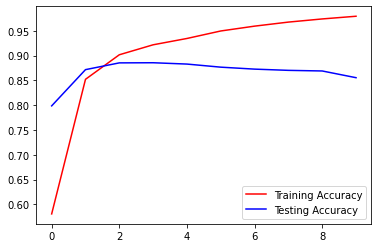

In [ ]:
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

#### Prediction

In [ ]:
y_pred = model.predict(X_test)
print(len(y_pred))

782/782 [==============================] - 22s 27ms/step
25000


#### Prediction plot

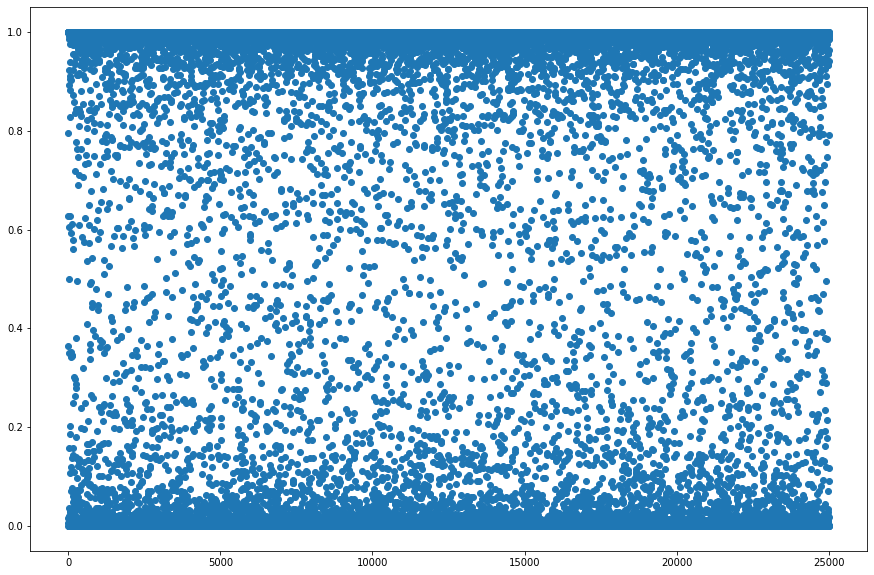

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(range(len(y_pred)), y_pred)
plt.show()


###### As it can be seen, most of the predictions lie at either 0 or 1, we can apply further thresholding to finalize the categories

##### Thresholding for 2 final categories

In [ ]:
for i in range(len(y_pred)):
    if (y_pred[i] >= 0.5):
        y_pred[i] = int(1)
    else:
        y_pred[i] = int(0)


##### Final evaluation

In [ ]:
incorr = 0
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        incorr += 1

print(incorr, '/', len(y_pred))


3614 / 25000


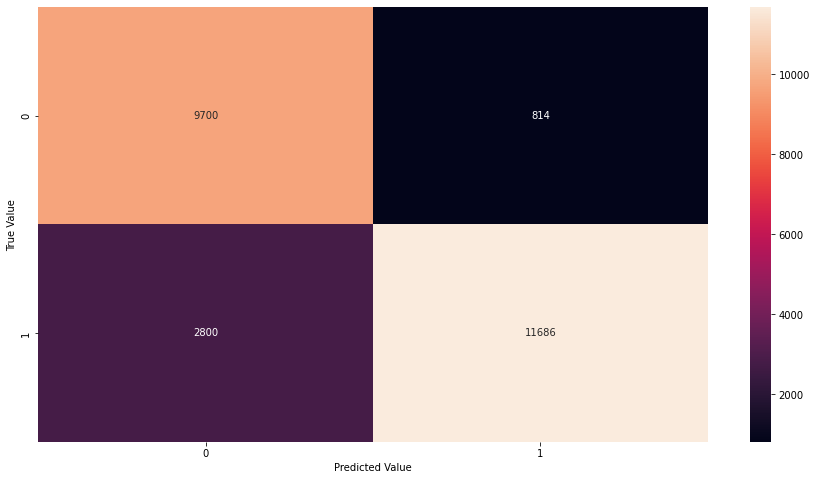

In [ ]:
confuse_mat = tf.math.confusion_matrix(labels=y_pred, predictions=y_test)
plt.figure(figsize=(15, 8))
sns.heatmap(confuse_mat, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
